In [8]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('../../data_50Hz.csv')
df.head()

,success,actual_time,optimal_time,world_idx,timestep,goal_x,goal_y,lidar_0,lidar_1,lidar_2,...,lidar_359,pos_x,pos_y,pose_heading,twist_linear,twist_angular,cmd_vel_linear,cmd_vel_angular,local_goal_x,local_goal_y
0,True,11.53,6.776516,0,0,0.0,10.0,2.953487,2.869737,2.848471,...,3.010891,-0.000056,0.001010,1.547277,0.015216,0.004864,0.09,0.013916,0.997539,0.073423
1,True,11.53,6.776516,0,1,0.0,10.0,2.956702,2.871896,2.849361,...,3.011203,-0.000025,0.002372,1.547351,0.038166,0.012513,0.12,0.018555,1.021175,0.073934
2,True,11.53,6.776516,0,2,0.0,10.0,2.958278,2.869057,2.851222,...,3.013201,0.000020,0.004364,1.547393,0.065010,0.006605,0.15,0.023194,1.019185,0.073891
3,True,11.53,6.776516,0,3,0.0,10.0,2.960670,2.870363,2.851820,...,3.010752,0.000080,0.006967,1.547525,0.093685,0.022431,0.18,0.011172,1.016592,0.073756
4,True,11.53,6.776516,0,4,0.0,10.0,2.962370,2.871268,2.855664,...,3.011739,0.000154,0.010177,1.547590,0.123362,0.008801,0.21,0.013033,1.013386,0.073689


In [9]:
df[df['world_idx'] == 0]

,success,actual_time,optimal_time,world_idx,timestep,goal_x,goal_y,lidar_0,lidar_1,lidar_2,...,lidar_359,pos_x,pos_y,pose_heading,twist_linear,twist_angular,cmd_vel_linear,cmd_vel_angular,local_goal_x,local_goal_y
0,True,11.530,6.776516,0,0,0.0,10.0,2.953487,2.869737,2.848471,...,3.010891,-0.000056,0.001010,1.547277,0.015216,0.004864,0.09,0.013916,0.997539,0.073423
1,True,11.530,6.776516,0,1,0.0,10.0,2.956702,2.871896,2.849361,...,3.011203,-0.000025,0.002372,1.547351,0.038166,0.012513,0.12,0.018555,1.021175,0.073934
2,True,11.530,6.776516,0,2,0.0,10.0,2.958278,2.869057,2.851222,...,3.013201,0.000020,0.004364,1.547393,0.065010,0.006605,0.15,0.023194,1.019185,0.073891
3,True,11.530,6.776516,0,3,0.0,10.0,2.960670,2.870363,2.851820,...,3.010752,0.000080,0.006967,1.547525,0.093685,0.022431,0.18,0.011172,1.016592,0.073756
4,True,11.530,6.776516,0,4,0.0,10.0,2.962370,2.871268,2.855664,...,3.011739,0.000154,0.010177,1.547590,0.123362,0.008801,0.21,0.013033,1.013386,0.073689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,True,11.545,6.782985,0,591,0.0,10.0,5.000000,5.000000,5.000000,...,3.304859,0.260688,9.042792,1.789403,0.800124,0.092154,0.80,0.052643,0.999738,0.043904
1785,True,11.545,6.782985,0,592,0.0,10.0,5.000000,5.000000,5.000000,...,3.326202,0.257214,9.058418,1.790221,0.800240,0.053950,0.80,0.052643,0.983802,0.045247
1786,True,11.545,6.782985,0,593,0.0,10.0,5.000000,5.000000,5.000000,...,3.357855,0.253733,9.074045,1.789903,0.800352,-0.000810,0.80,0.052643,0.967778,0.045558
1787,True,11.545,6.782985,0,594,0.0,10.0,5.000000,5.000000,5.000000,...,3.536593,0.250253,9.089671,1.790002,0.800414,0.005974,0.80,0.068135,0.951773,0.045464


In [39]:
# # remove rows with success = 0
df = df[df['success'] == 1]

In [40]:
# # check number of local_goal_x ** 2 + local_goal_y ** 2 < 0.25
# df['distance'] = df['local_goal_x'] ** 2 + df['local_goal_y'] ** 2
# df = df[df['distance'] > 0.25]

(array([8.61000e+02, 9.70000e+01, 2.17000e+02, 2.45000e+02, 2.68000e+02,
        3.21000e+02, 3.13000e+02, 5.56000e+02, 7.04000e+02, 8.66000e+02,
        1.03900e+03, 1.43900e+03, 1.50300e+03, 5.48200e+03, 2.59600e+03,
        3.03200e+03, 3.75800e+03, 4.83100e+03, 6.18200e+03, 8.56400e+03,
        1.16310e+04, 1.67590e+04, 3.13700e+04, 7.52520e+04, 1.11437e+05,
        1.17948e+05, 5.19880e+04, 2.36980e+04, 1.47700e+04, 1.04690e+04,
        7.94800e+03, 6.64000e+03, 5.44700e+03, 4.25000e+03, 3.62100e+03,
        2.89900e+03, 5.12100e+03, 2.00200e+03, 1.67500e+03, 1.34200e+03,
        1.18900e+03, 9.40000e+02, 8.86000e+02, 4.68000e+02, 4.62000e+02,
        3.36000e+02, 2.42000e+02, 2.07000e+02, 1.41000e+02, 9.61000e+02]),
 array([-1.57079633e+00, -1.50796447e+00, -1.44513262e+00, -1.38230077e+00,
        -1.31946891e+00, -1.25663706e+00, -1.19380521e+00, -1.13097336e+00,
        -1.06814150e+00, -1.00530965e+00, -9.42477796e-01, -8.79645943e-01,
        -8.16814090e-01, -7.53982237e-01

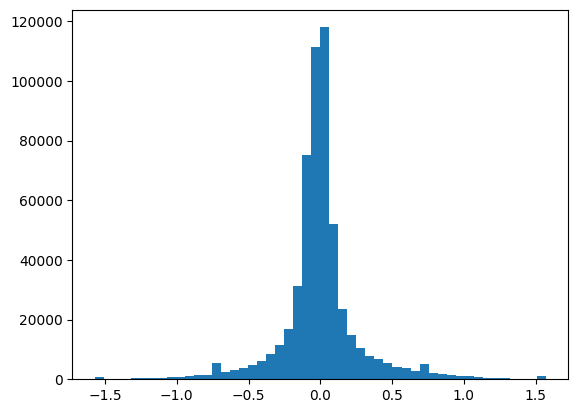

In [41]:
# plot histogram of cmd_vel_angular
import matplotlib.pyplot as plt
plt.hist(df['cmd_vel_angular'], bins=50)

In [42]:
# # plot histogram of cmd_vel_angular
# import matplotlib.pyplot as plt
# plt.hist(df_filtered['cmd_vel_angular'], bins=50)

In [43]:
# check number of unsuccesful worlds
df['success'].value_counts()

success
True    554973
Name: count, dtype: int64

In [44]:
df.describe()

,actual_time,optimal_time,world_idx,timestep,goal_x,goal_y,lidar_0,lidar_1,lidar_2,lidar_3,...,lidar_359,pos_x,pos_y,pose_heading,twist_linear,twist_angular,cmd_vel_linear,cmd_vel_angular,local_goal_x,local_goal_y
count,554973.000000,554973.000000,554973.000000,554973.000000,554973.0,554973.0,554973.000000,554973.000000,554973.000000,554973.000000,...,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000
mean,12.259048,5.716841,151.319140,313.696198,0.0,10.0,2.626697,2.610495,2.594688,2.580224,...,2.570933,-0.026526,4.470110,1.549228,0.775685,-0.000481,0.776109,-0.001090,0.977993,0.001147
std,2.273365,0.373244,86.703978,192.859723,0.0,0.0,1.296723,1.294866,1.293297,1.293029,...,1.310691,0.573949,2.647403,0.413160,0.124030,0.316548,0.119066,0.290502,0.152300,0.207453
min,11.165000,5.012248,0.000000,0.000000,0.0,10.0,0.292027,0.287642,0.285270,0.281570,...,0.217051,-1.811188,0.000263,-3.141152,-0.318413,-2.506347,-0.300000,-1.570796,-1.024131,-1.025240
25%,11.404000,5.449447,77.000000,154.000000,0.0,10.0,1.538159,1.527395,1.516633,1.505974,...,1.476724,-0.378162,2.188165,1.436482,0.800021,-0.083711,0.800000,-0.089032,0.998515,-0.058111
50%,11.612000,5.628741,151.000000,308.000000,0.0,10.0,2.648689,2.628465,2.607874,2.588119,...,2.566847,-0.030590,4.385300,1.585563,0.800496,-0.002824,0.800000,-0.007541,1.006663,-0.003594
75%,12.027000,5.923911,227.000000,462.000000,0.0,10.0,3.427153,3.398267,3.370909,3.345454,...,3.367440,0.312517,6.744542,1.710501,0.801997,0.061823,0.800000,0.069420,1.014649,0.050435
max,33.139000,6.930695,299.000000,1670.000000,0.0,10.0,5.000000,5.000000,5.000000,5.000000,...,5.000000,1.894076,9.340227,3.141573,0.821323,2.281988,0.800000,1.570796,1.051611,1.023490


In [45]:
# print rows with missing values
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [success, actual_time, optimal_time, world_idx, timestep, goal_x, goal_y, lidar_0, lidar_1, lidar_2, lidar_3, lidar_4, lidar_5, lidar_6, lidar_7, lidar_8, lidar_9, lidar_10, lidar_11, lidar_12, lidar_13, lidar_14, lidar_15, lidar_16, lidar_17, lidar_18, lidar_19, lidar_20, lidar_21, lidar_22, lidar_23, lidar_24, lidar_25, lidar_26, lidar_27, lidar_28, lidar_29, lidar_30, lidar_31, lidar_32, lidar_33, lidar_34, lidar_35, lidar_36, lidar_37, lidar_38, lidar_39, lidar_40, lidar_41, lidar_42, lidar_43, lidar_44, lidar_45, lidar_46, lidar_47, lidar_48, lidar_49, lidar_50, lidar_51, lidar_52, lidar_53, lidar_54, lidar_55, lidar_56, lidar_57, lidar_58, lidar_59, lidar_60, lidar_61, lidar_62, lidar_63, lidar_64, lidar_65, lidar_66, lidar_67, lidar_68, lidar_69, lidar_70, lidar_71, lidar_72, lidar_73, lidar_74, lidar_75, lidar_76, lidar_77, lidar_78, lidar_79, lidar_80, lidar_81, lidar_82, lidar_83, lidar_84, lidar_85, lidar_86, lidar_87, lidar_88, lidar_89, lidar_90, l

In [46]:
# torch Dataset
from torch.utils.data import Dataset
import numpy as np
import json

class KULBarnDataset(Dataset):
    def get_normalized_goal(self):
        x = self.data['pos_x']
        y = self.data['pos_y']
        goal_x = self.data['goal_x']
        goal_y = self.data['goal_y']
        theta = self.data['pose_heading']
        self.data['goal_x'] = np.cos(theta) * (goal_x - x) + np.sin(theta) * (goal_y - y)
        self.data['goal_y'] = -np.sin(theta) * (goal_x - x) + np.cos(theta) * (goal_y - y)
        # dist = np.sqrt(self.data['goal_x'] ** 2 + self.data['goal_y'] ** 2)
        # self.data['goal_x'] /= dist
        # self.data['goal_y'] /= dist
    
    def __init__(self, df, mode="train"):
        super().__init__()

        self.data = df
        self.get_normalized_goal()  
        
        # get all the column values that contain the word lidar
        self.lidar_cols = ["lidar_" + str(i) for i in range(0, 360, 1)]
        # get actions columns
        self.actions_cols = ['cmd_vel_linear', 'cmd_vel_angular']
        # get other columns
        self.non_lidar_cols = ['local_goal_x', 'local_goal_y', 'goal_x', 'goal_y']

        # if mode == "train":
        #     # Manually compute the min and max values for each column
        #     self.min = self.data.min()
        #     self.max = self.data.max()
        #     # Save the mean and std to a JSON file
        #     scaler_params = {
        #         'min': self.min.to_dict(),
        #         'max': self.max.to_dict()
        #     }
        #     with open('scaler_params.json', 'w') as f:
        #         json.dump(scaler_params, f)
        # else:
        #     # Load the mean and std from the JSON file
        #     with open('scaler_params.json', 'r') as f:
        #         scaler_params = json.load(f)
        #     self.min = pd.Series(scaler_params['min'])
        #     self.max = pd.Series(scaler_params['max'])
        
        # dont normalizer local_x and local_y
        # self.normalized_data = (self.data - self.min) / (self.max - self.min)
        self.normalized_data = self.data
         
        self.lidar_data = self.normalized_data[self.lidar_cols].values
        self.non_lidar_data = self.normalized_data[self.non_lidar_cols].values
        self.actions_data = self.normalized_data[self.actions_cols].values

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        lidar = self.lidar_data[idx]
        non_lidar = self.non_lidar_data[idx]
        actions = self.actions_data[idx]
        return lidar, non_lidar, actions

In [47]:
# take random 90% of the world ids for training
ids = df['world_idx'].unique()

test_ids = list(range(0, 300, 5))

non_test_ids = np.setdiff1d(ids, test_ids)

train_ids = np.random.choice(non_test_ids, int(0.8 * len(non_test_ids)), replace=False)
train_df = df[df['world_idx'].isin(train_ids)]
train_dataset = KULBarnDataset(train_df, mode="train")

# take the remaining of the world ids for validation
val_ids = np.setdiff1d(non_test_ids, train_ids)
val_df = df[df['world_idx'].isin(val_ids)]
val_dataset = KULBarnDataset(val_df, mode="val")

In [48]:
print(len(train_ids), len(val_ids))

192 48


In [49]:
print("Train Dataset Length:", len(train_dataset))
print("Val Dataset Length:", len(val_dataset))

Train Dataset Length: 355482
Val Dataset Length: 87520


In [50]:
# dataloader
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
# test dataloader
lidar, non_lidar, actions = next(iter(train_loader))
print(f"Non lidar shape: {non_lidar.shape}")
print(f"Lidar shape: {lidar.shape}")
# print size dataloader
print(f"Train loader size: {len(train_loader)}")
print(f"Val loader size: {len(val_loader)}")
print(lidar, non_lidar, actions)

Non lidar shape: torch.Size([64, 4])
Lidar shape: torch.Size([64, 360])
Train loader size: 5555
Val loader size: 1368
tensor([[4.1891, 4.2293, 5.0000,  ..., 5.0000, 5.0000, 5.0000],
        [0.6376, 0.6520, 0.8003,  ..., 0.3954, 0.4083, 0.4211],
        [5.0000, 5.0000, 5.0000,  ..., 3.9805, 3.9993, 4.0965],
        ...,
        [3.0564, 3.0413, 3.0458,  ..., 2.8291, 2.8346, 2.8672],
        [3.0047, 2.9803, 2.9828,  ..., 2.8960, 2.9242, 2.9316],
        [3.0983, 3.0469, 2.9917,  ..., 2.8137, 2.8703, 2.9022]],
       dtype=torch.float64) tensor([[ 1.0094e+00, -4.4492e-02,  1.1990e+00, -7.9924e-02],
        [ 9.3930e-01,  3.8028e-01,  3.5958e+00,  2.4351e+00],
        [ 1.0061e+00,  1.0202e-02,  1.8343e+00,  1.0431e-01],
        [ 1.0177e+00, -1.8371e-02,  2.3369e+00, -1.9387e-01],
        [ 1.0185e+00,  3.2077e-02,  2.2539e+00,  1.5019e-01],
        [ 1.0032e+00,  2.1043e-02,  2.2820e+00,  1.1016e-01],
        [ 1.0026e+00, -2.2659e-02,  3.5433e+00, -3.0900e-01],
        [-9.7709e-01, 

In [51]:
lidar

tensor([[4.1891, 4.2293, 5.0000,  ..., 5.0000, 5.0000, 5.0000],
        [0.6376, 0.6520, 0.8003,  ..., 0.3954, 0.4083, 0.4211],
        [5.0000, 5.0000, 5.0000,  ..., 3.9805, 3.9993, 4.0965],
        ...,
        [3.0564, 3.0413, 3.0458,  ..., 2.8291, 2.8346, 2.8672],
        [3.0047, 2.9803, 2.9828,  ..., 2.8960, 2.9242, 2.9316],
        [3.0983, 3.0469, 2.9917,  ..., 2.8137, 2.8703, 2.9022]],
       dtype=torch.float64)

In [52]:
non_lidar

tensor([[ 1.0094e+00, -4.4492e-02,  1.1990e+00, -7.9924e-02],
        [ 9.3930e-01,  3.8028e-01,  3.5958e+00,  2.4351e+00],
        [ 1.0061e+00,  1.0202e-02,  1.8343e+00,  1.0431e-01],
        [ 1.0177e+00, -1.8371e-02,  2.3369e+00, -1.9387e-01],
        [ 1.0185e+00,  3.2077e-02,  2.2539e+00,  1.5019e-01],
        [ 1.0032e+00,  2.1043e-02,  2.2820e+00,  1.1016e-01],
        [ 1.0026e+00, -2.2659e-02,  3.5433e+00, -3.0900e-01],
        [-9.7709e-01, -2.2492e-01,  2.6640e+00, -5.4771e+00],
        [ 9.9854e-01, -5.6612e-02,  9.2173e+00,  3.3361e-01],
        [ 1.0184e+00,  1.4659e-02,  2.7448e+00,  2.2171e-01],
        [ 9.9958e-01, -8.8092e-02,  9.9137e-01, -8.6597e-02],
        [ 1.0240e+00,  4.5851e-02,  3.6500e+00, -3.4652e+00],
        [ 8.6285e-01,  5.1121e-01,  3.8313e+00,  7.9192e+00],
        [ 1.0179e+00,  6.1489e-02,  4.3167e+00,  3.4850e+00],
        [ 1.0057e+00, -1.3711e-01,  8.9790e+00,  1.3266e+00],
        [ 1.0063e+00, -5.2259e-02,  6.6643e+00,  5.3814e-01],
        

In [53]:
actions

tensor([[ 0.8000, -0.0765],
        [ 0.8000,  0.2615],
        [ 0.8000,  0.0209],
        [ 0.8000, -0.0172],
        [ 0.8000,  0.0555],
        [ 0.8000,  0.0432],
        [ 0.8000, -0.0241],
        [-0.0000,  0.7500],
        [ 0.8000, -0.1051],
        [ 0.8000,  0.0651],
        [ 0.8000, -0.1320],
        [ 0.8000,  0.1333],
        [ 0.8000,  0.8888],
        [ 0.8000,  0.0838],
        [ 0.8000, -0.2115],
        [ 0.8000, -0.0634],
        [ 0.8000,  0.0074],
        [ 0.8000, -0.1102],
        [ 0.8000,  0.8135],
        [ 0.8000, -0.1738],
        [ 0.8000,  0.0909],
        [ 0.8000,  0.0976],
        [ 0.8000, -0.0621],
        [ 0.1700,  1.0982],
        [ 0.8000, -0.1536],
        [ 0.8000, -0.0072],
        [ 0.8000,  0.0678],
        [ 0.0500,  0.3853],
        [ 0.8000, -0.1358],
        [ 0.8000, -0.6265],
        [ 0.8000, -0.0601],
        [ 0.8000, -0.0708],
        [ 0.8000,  0.0761],
        [ 0.8000,  0.0491],
        [ 0.8000, -0.1484],
        [ 0.8000, -0

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self, num_lidar_features, num_non_lidar_features, num_actions, nframes=1):
        super(CNNModel, self).__init__()
        self.act_fea_cv1 = nn.Conv1d(
            in_channels=nframes, out_channels=32, kernel_size=5, stride=2, padding=6, padding_mode='circular'
        )
        self.act_fea_cv2 = nn.Conv1d(
            in_channels=32, out_channels=32, kernel_size=3, stride=2, padding=1
        )

        with torch.no_grad():
            sample_input = torch.randn(1, nframes, num_lidar_features)
            sample_output = self.act_fea_cv1(sample_input)
            sample_output = self.act_fea_cv2(sample_output)
            conv_output_size = sample_output.view(1, -1).shape[1]

        # Calculate the output size of the CNN
        self.fc1 = nn.Linear(conv_output_size, 64)
        self.fc2 = nn.Linear(64 + num_non_lidar_features * nframes, 64)
        self.fc3 = nn.Linear(64, num_actions)

        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, lidar, non_lidar):
        feat = F.relu(self.act_fea_cv1(lidar))
        feat = F.relu(self.act_fea_cv2(feat))
        feat = feat.view(feat.shape[0], -1)
        feat = F.relu(self.fc1(feat))
        # feat = torch.cat((feat, non_lidar.view(non_lidar.shape[0], -1)), dim=-1)
        feat = torch.cat((feat, non_lidar.flatten(start_dim=1)), dim=-1)
        feat = F.relu(self.fc2(feat))
        feat = self.fc3(feat)
        return feat

In [55]:
# make a CustomLoss prioritizing the angular velocity
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, pred, target):
        # increase the loss of the second element of the prediction
        # this is the angular velocity
        loss = (pred - target) ** 2
        loss[:, 1] *= 2
        return loss.mean()

In [56]:
# Initialize the model
num_lidar_features = len(train_dataset.lidar_cols)
num_non_lidar_features = len(train_dataset.non_lidar_cols)
num_actions = len(train_dataset.actions_cols)
model = CNNModel(num_lidar_features, num_non_lidar_features, num_actions)

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Move the model and loss function to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
loss_fn = loss_fn.to(device)
print(device)

cuda


In [57]:
from tqdm import tqdm

def train_model(model, train_loader, loss_fn, optimizer):
    model.train()

    losses = []
    for lidar, non_lidar, actions in tqdm(train_loader):
        # Move the data to the device that is used
        lidar = lidar.to(device).unsqueeze(1)
        non_lidar = non_lidar.to(device).unsqueeze(1)
        actions = actions.to(device)

        # Forward pass
        actions_pred = model(lidar.float(), non_lidar.float())
        loss = loss_fn(actions_pred, actions.float())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save the loss
        losses.append(loss.item())

    # return the average loss for this epoch
    return sum(losses)/len(losses)

In [58]:
def test_model(model, test_loader, loss_fn):
    model.eval()

    losses = []
    for lidar, non_lidar, actions in tqdm(test_loader):
        # Move the data to the device that is used
        lidar = lidar.to(device).unsqueeze(1)
        non_lidar = non_lidar.to(device).unsqueeze(1)
        actions = actions.to(device)

        # Forward pass
        actions_pred = model(lidar.float(), non_lidar.float())
        loss = loss_fn(actions_pred, actions.float())

        # Save the loss
        losses.append(loss.item())

    # return the average loss for this epoch
    return sum(losses)/len(losses)

In [59]:
# import sys
# NUM_EPOCHS = 50

# random_val_loss = test_model(model, val_loader, loss_fn)
# print("Random val loss:", random_val_loss)
# sys.stdout.flush()

# cnn_train_losses = []
# cnn_val_losses = []
# best_val_loss = float('inf')
# patience = 3
# no_improve_epochs = 0

# for epoch in range(NUM_EPOCHS):
#     train_loss = train_model(model, train_loader, loss_fn, optimizer)
#     val_loss = test_model(model, val_loader, loss_fn)
#     cnn_train_losses.append(train_loss)
#     cnn_val_losses.append(val_loss)
#     print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Train Loss: {train_loss} | Val Loss: {val_loss}")
#     sys.stdout.flush()

#     # Early stopping
#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         no_improve_epochs = 0
#     else:
#         no_improve_epochs += 1
#         if no_improve_epochs >= patience:
#             print("Early stopping due to no improvement after {} epochs.".format(patience))
#             break

In [60]:
# # plot the loss
# import matplotlib.pyplot as plt

# plt.plot(cnn_train_losses, label='Train Loss')
# plt.plot(cnn_val_losses, label='Val Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show();

In [61]:
# save the model
# torch.save(model.state_dict(), 'cnn_model.pth')

In [62]:
def test_model(model, test_loader, loss_fn):
    model.eval()

    losses = []
    for lidar, non_lidar, actions in tqdm(test_loader):
        # Move the data to the device that is used
        lidar = lidar.to(device).unsqueeze(1)
        non_lidar = non_lidar.to(device).unsqueeze(1)
        actions = actions.to(device)

        # Forward pass
        actions_pred = model(lidar.float(), non_lidar.float())
        loss = loss_fn(actions_pred, actions.float())

        if loss.item() > 0.1:
            print("---------------------------")
            print("Loss:", loss.item())
            print("Predicted:", actions_pred)
            print("Actual:", actions)
            print("Non lidar:", non_lidar)
            continue

        # Save the loss
        losses.append(loss.item())

    # return the average loss for this epoch
    return sum(losses)/len(losses)

In [63]:
# load file and check MSELoss
model = CNNModel(num_lidar_features, num_non_lidar_features, num_actions)
model.load_state_dict(torch.load('cnn_model.pth', map_location=torch.device('cpu')))
model.eval()
device = 'cpu'

# take world idx 0 as example
dataset = KULBarnDataset(df[df['world_idx'] == 0], "val")
loader = DataLoader(dataset, batch_size=1, shuffle=False)

final_val_loss = test_model(model, loader, loss_fn)
print("Final val loss:", final_val_loss)

 15%|█▌        | 269/1789 [00:00<00:01, 1436.02it/s]

---------------------------
Loss: 0.17604592442512512
Predicted: tensor([[0.6789, 0.0863]], grad_fn=<AddmmBackward0>)
Actual: tensor([[0.0900, 0.0139]], dtype=torch.float64)
Non lidar: tensor([[[0.9975, 0.0734, 9.9962, 0.2351]]], dtype=torch.float64)
---------------------------
Loss: 0.16187474131584167
Predicted: tensor([[0.6853, 0.0833]], grad_fn=<AddmmBackward0>)
Actual: tensor([[0.1200, 0.0186]], dtype=torch.float64)
Non lidar: tensor([[[1.0212, 0.0739, 9.9949, 0.2343]]], dtype=torch.float64)
---------------------------
Loss: 0.14499592781066895
Predicted: tensor([[0.6851, 0.0839]], grad_fn=<AddmmBackward0>)
Actual: tensor([[0.1500, 0.0232]], dtype=torch.float64)
Non lidar: tensor([[[1.0192, 0.0739, 9.9929, 0.2339]]], dtype=torch.float64)
---------------------------
Loss: 0.13023898005485535
Predicted: tensor([[0.6850, 0.0851]], grad_fn=<AddmmBackward0>)
Actual: tensor([[0.1800, 0.0112]], dtype=torch.float64)
Non lidar: tensor([[[1.0166, 0.0738, 9.9903, 0.2326]]], dtype=torch.float

100%|██████████| 1789/1789 [00:00<00:00, 2182.52it/s]

---------------------------
Loss: 0.16021324694156647
Predicted: tensor([[0.7408, 0.1175]], grad_fn=<AddmmBackward0>)
Actual: tensor([[0.1800, 0.0403]], dtype=torch.float64)
Non lidar: tensor([[[1.0119, 0.1120, 9.9331, 1.0930]]], dtype=torch.float64)
---------------------------
Loss: 0.14282071590423584
Predicted: tensor([[0.7399, 0.1170]], grad_fn=<AddmmBackward0>)
Actual: tensor([[0.2100, 0.0470]], dtype=torch.float64)
Non lidar: tensor([[[1.0088, 0.1116, 9.9304, 1.0889]]], dtype=torch.float64)
---------------------------
Loss: 0.12632997334003448
Predicted: tensor([[0.7388, 0.1160]], grad_fn=<AddmmBackward0>)
Actual: tensor([[0.2400, 0.0537]], dtype=torch.float64)
Non lidar: tensor([[[1.0051, 0.1109, 9.9274, 1.0827]]], dtype=torch.float64)
---------------------------
Loss: 0.11394906789064407
Predicted: tensor([[0.7442, 0.1157]], grad_fn=<AddmmBackward0>)
Actual: tensor([[0.2700, 0.0605]], dtype=torch.float64)
Non lidar: tensor([[[1.0009, 0.1103, 9.9237, 1.0763]]], dtype=torch.float

In [64]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F


class MultiHeadAttention(nn.Module):
    def __init__(
            self,
            input_dim,
            num_heads,
            dropout=0.0,
            bias=False,
            encoder_decoder_attention=False,
            causal=False
    ):
        super().__init__()
        self.input_dim = input_dim
        self.num_heads = num_heads
        self.dropout = dropout
        self.head_dim = input_dim // num_heads
        self.encoder_decoder_attention = encoder_decoder_attention
        self.causal = causal
        self.k_proj = nn.Linear(input_dim, input_dim, bias=bias)
        self.v_proj = nn.Linear(input_dim, input_dim, bias=bias)
        self.q_proj = nn.Linear(input_dim, input_dim, bias=bias)
        self.out_proj = nn.Linear(input_dim, input_dim, bias=bias)

    def transpose_for_scores(self, x):
        new_x_shape = x.size()[:-1] + (self.num_heads, self.head_dim,)
        x = x.view(*new_x_shape)
        return x.permute(0, 2, 1, 3)

    def multi_head_scaled_dot_product(self,
                                      query: torch.Tensor,
                                      key: torch.Tensor,
                                      value: torch.Tensor,
                                      attention_mask: torch.BoolTensor):
        attn_weights = torch.matmul(query, key.transpose(-1, -2) / math.sqrt(self.input_dim))
        if attention_mask is not None:
            if self.causal:
                attn_weights = attn_weights.masked_fill(attention_mask.unsqueeze(0).unsqueeze(1), float("-inf"))
            else:
                attn_weights = attn_weights.masked_fill(attention_mask.unsqueeze(1).unsqueeze(2), float("-inf"))
        attn_weights = F.softmax(attn_weights, dim=-1)
        attn_probs = F.dropout(attn_weights, p=self.dropout, training=self.training)
        attn_output = torch.matmul(attn_probs, value)
        attn_output = attn_output.permute(0, 2, 1, 3).contiguous()
        concat_attn_output_shape = attn_output.size()[:-2] + (self.input_dim,)
        attn_output = attn_output.view(*concat_attn_output_shape)
        attn_output = self.out_proj(attn_output)
        return attn_output, attn_weights

    def forward(
            self,
            query: torch.Tensor,
            key: torch.Tensor,
            attention_mask: torch.BoolTensor):
        q = self.q_proj(query)
        if self.encoder_decoder_attention:
            k = self.k_proj(key)
            v = self.v_proj(key)
        else:
            k = self.k_proj(query)
            v = self.v_proj(query)
        q = self.transpose_for_scores(q)
        k = self.transpose_for_scores(k)
        v = self.transpose_for_scores(v)

        attn_output, attn_weights = self.multi_head_scaled_dot_product(q, k, v, attention_mask)
        return attn_output, attn_weights


class PositionWiseFeedForward(nn.Module):

    def __init__(self, input_dim: int, d_ff: int, dropout: float = 0.1):
        super(PositionWiseFeedForward, self).__init__()

        self.activation = nn.ReLU()
        self.w_1 = nn.Linear(input_dim, d_ff)
        self.w_2 = nn.Linear(d_ff, input_dim)
        self.dropout = dropout

    def forward(self, x):
        residual = x
        x = self.activation(self.w_1(x))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.w_2(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        return x + residual


class EmbeddingLidar(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.len_lidar = config.lidar_dim
        self.num_patch = config.num_patch
        self.dim_patch = self.len_lidar // self.num_patch
        self.model_dim = config.model_dim
        self.dropout = config.dropout
        self.pos_embed = nn.Parameter(torch.randn(self.num_patch, self.model_dim))

        self.linear = nn.Linear(self.dim_patch, self.model_dim)

    def forward(self, inputs):
        x = inputs.view([-1, self.num_patch, self.dim_patch])
        x = self.linear(x)
        x = x + self.pos_embed
        x = F.dropout(x, p=self.dropout, training=self.training)
        return x


class EncoderLayer(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.input_dim = config.input_dim
        self.ffn_dim = config.ffn_dim
        self.self_attn = MultiHeadAttention(
            input_dim=self.input_dim,
            num_heads=config.attention_heads,
            dropout=config.attention_dropout)
        self.self_attn_layer_norm = nn.LayerNorm(self.input_dim)
        self.dropout = config.dropout
        self.activation_fn = nn.ReLU()
        self.PositionWiseFeedForward = PositionWiseFeedForward(self.input_dim, self.ffn_dim, config.dropout)
        self.final_layer_norm = nn.LayerNorm(self.input_dim)

    def forward(self, x, encoder_padding_mask):
        residual = x
        x, attn_weights = self.self_attn(query=x, key=x, attention_mask=encoder_padding_mask)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = residual + x
        x = self.self_attn_layer_norm(x)
        x = self.PositionWiseFeedForward(x)
        x = self.final_layer_norm(x)
        return x, attn_weights


class Encoder(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.dropout = config.dropout

        self.embedding = EmbeddingLidar(config)

        self.layers = nn.ModuleList([EncoderLayer(config) for _ in range(config.encoder_layers)])

    def forward(self, inputs, attention_mask=None):
        x = self.embedding(inputs)
        self_attn_scores = []
        for encoder_layer in self.layers:
            x, attn = encoder_layer(x, attention_mask)
            self_attn_scores.append(attn.detach())

        return x, self_attn_scores


class DecoderLayer(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.input_dim = config.input_dim
        self.ffn_dim = config.ffn_dim
        self.dropout = config.dropout
        self.self_attn_layer_norm = nn.LayerNorm(self.input_dim)
        self.encoder_attn = MultiHeadAttention(
            input_dim=self.input_dim,
            num_heads=config.attention_heads,
            dropout=config.attention_dropout,
            encoder_decoder_attention=True,
        )
        self.encoder_attn_layer_norm = nn.LayerNorm(self.input_dim)
        self.PositionWiseFeedForward = PositionWiseFeedForward(self.input_dim, self.ffn_dim, config.dropout)
        self.final_layer_norm = nn.LayerNorm(self.input_dim)

    def forward(
            self,
            x,
            encoder_hidden_states,
            encoder_attention_mask=None,
    ):
        residual = x
        x, cross_attn_weights = self.encoder_attn(
            query=x,
            key=encoder_hidden_states,
            attention_mask=encoder_attention_mask,
        )
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = residual + x
        x = self.encoder_attn_layer_norm(x)
        x = self.PositionWiseFeedForward(x)
        x = self.final_layer_norm(x)

        return (
            x,
            cross_attn_weights,
        )


class Decoder(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.dropout = config.dropout
        self.model_dim = config.model_dim
        self.linear = nn.Linear(1, self.model_dim)
        self.layers = nn.ModuleList([DecoderLayer(config) for _ in range(config.decoder_layers)])

    def forward(
            self,
            inputs,
            encoder_hidden_states,
    ):
        x = inputs
        x = self.linear(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        cross_attention_scores = []
        for idx, decoder_layer in enumerate(self.layers):
            x, layer_cross_attn = decoder_layer(
                x,
                encoder_hidden_states,
            )
            cross_attention_scores.append(layer_cross_attn.detach())
        return x, cross_attention_scores


class Transformer(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.non_lidar_dim = config.non_lidar_dim
        self.model_dim = config.model_dim
        self.encoder = Encoder(config)
        self.decoder = Decoder(config)

        self.prediction_head = nn.Linear(self.model_dim * self.non_lidar_dim, 2)

        self.init_weights()

    def init_weights(self):
        for name, param in self.named_parameters():
            if param.requires_grad:
                if 'weight' in name:
                    nn.init.normal_(param.data, mean=0, std=0.01)
                else:
                    nn.init.constant_(param.data, 0)

    def forward(self, src, trg):
        encoder_output, encoder_attention_scores = self.encoder(
            inputs=src
        )
        decoder_output, decoder_attention_scores = self.decoder(
            trg,
            encoder_output
        )
        decoder_output = decoder_output.view(-1, self.model_dim * self.non_lidar_dim)
        decoder_output = self.prediction_head(decoder_output)
        
        return decoder_output, encoder_attention_scores, decoder_attention_scores

In [65]:
def train_model(model, train_loader, loss_fn, optimizer):
    model.train()

    losses = []
    for lidar, non_lidar, actions in tqdm(train_loader):
        lidar = lidar.to(device).unsqueeze(-1)
        non_lidar = non_lidar.to(device).unsqueeze(-1)
        actions = actions.to(device)

        actions_pred, _, _ = model(lidar.float(), non_lidar.float())
        loss = loss_fn(actions_pred, actions.float())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save the loss
        losses.append(loss.item())

    # return the average loss for this epoch
    return sum(losses)/len(losses)

In [66]:
def test_model(model, test_loader, loss_fn):
    model.eval()

    losses = []
    for lidar, non_lidar, actions in tqdm(test_loader):
        lidar = lidar.to(device).unsqueeze(-1)
        non_lidar = non_lidar.to(device).unsqueeze(-1)
        actions = actions.to(device)

        actions_pred, _, _ = model(lidar.float(), non_lidar.float())

        loss = loss_fn(actions_pred, actions.float())

        losses.append(loss.item())

    # return the average loss for this epoch
    return sum(losses)/len(losses)

In [69]:
import easydict

# Initialize the model
num_lidar_features = len(train_dataset.lidar_cols)
num_non_lidar_features = len(train_dataset.non_lidar_cols)
num_actions = len(train_dataset.actions_cols)

config_dict = easydict.EasyDict({
    "input_dim": 32,
    "num_patch": 36,
    "model_dim": 32,
    "ffn_dim": 256,
    "attention_heads": 4,
    "attention_dropout": 0.0,
    "dropout": 0.5,
    "encoder_layers": 2,
    "decoder_layers": 2,
    "lidar_dim": 360,
    "non_lidar_dim": 4,
    "device": "cpu",
})

model = Transformer(config_dict)

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Move the model and loss function to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
loss_fn = loss_fn.to(device)
print(device)

cuda


In [70]:
import sys
NUM_EPOCHS = 50

random_val_loss = test_model(model, val_loader, loss_fn)
print("Random val loss:", random_val_loss)

transformer_train_losses = []
transformer_val_losses = []
best_val_loss = float('inf')
patience = 3
no_improve_epochs = 0
save_every = 5

for epoch in range(1, NUM_EPOCHS+1):
    train_loss = train_model(model, train_loader, loss_fn, optimizer)
    val_loss = test_model(model, val_loader, loss_fn)
    transformer_train_losses.append(train_loss)
    transformer_val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Train Loss: {train_loss} | Val Loss: {val_loss}")
    sys.stdout.flush()

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve_epochs = 0
    else:
        no_improve_epochs += 1
        if no_improve_epochs >= patience:
            print("Early stopping due to no improvement after {} epochs.".format(patience))
            break
    
    # if epoch % save_every == 0:
    #     torch.save(model.state_dict(), f'transformer_model_{epoch}.pth')
    #     print(f"Model saved at epoch {epoch}")

100%|██████████| 1368/1368 [00:06<00:00, 213.86it/s]


Random val loss: 0.3530645494115109


100%|██████████| 1368/1368 [00:04<00:00, 284.48it/s]

Epoch 2/50 | Train Loss: 0.15075266739801177 | Val Loss: 0.04009330039815196



100%|██████████| 1368/1368 [00:05<00:00, 257.06it/s]

Epoch 3/50 | Train Loss: 0.03643872657343142 | Val Loss: 0.026557865125125733



100%|██████████| 1368/1368 [00:04<00:00, 280.02it/s]

Epoch 4/50 | Train Loss: 0.025288012791986635 | Val Loss: 0.018639434487002886



100%|██████████| 1368/1368 [00:05<00:00, 252.59it/s]

Epoch 5/50 | Train Loss: 0.01986906429665527 | Val Loss: 0.015296926806226302



100%|██████████| 1368/1368 [00:04<00:00, 276.23it/s]

Epoch 6/50 | Train Loss: 0.018088555732900385 | Val Loss: 0.01370929466029019



100%|██████████| 1368/1368 [00:04<00:00, 285.82it/s]

Epoch 7/50 | Train Loss: 0.01745991376872006 | Val Loss: 0.013421671791904203



100%|██████████| 1368/1368 [00:04<00:00, 287.83it/s]

Epoch 8/50 | Train Loss: 0.017141110411049626 | Val Loss: 0.013083743458279399



100%|██████████| 1368/1368 [00:04<00:00, 284.20it/s]

Epoch 9/50 | Train Loss: 0.016919055868222687 | Val Loss: 0.013583069413093467



100%|██████████| 1368/1368 [00:04<00:00, 277.50it/s]

Epoch 10/50 | Train Loss: 0.016740585925957837 | Val Loss: 0.014288075304031407



100%|██████████| 1368/1368 [00:05<00:00, 271.40it/s]

Epoch 11/50 | Train Loss: 0.016539022758578787 | Val Loss: 0.013506586282809414
Early stopping due to no improvement after 3 epochs.


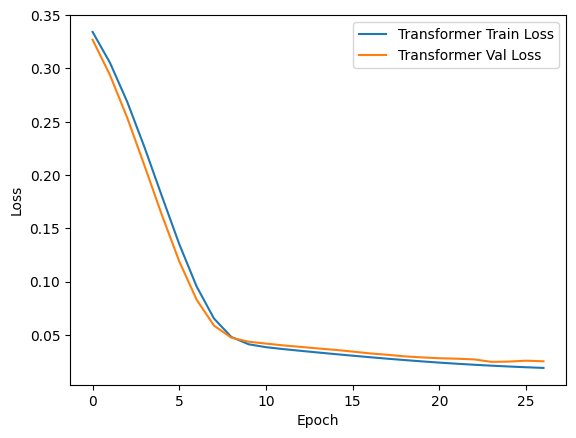

In [ ]:
# plot the loss
import matplotlib.pyplot as plt

plt.plot(transformer_train_losses, label='Transformer Train Loss')  
plt.plot(transformer_val_losses, label='Transformer Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [ ]:
# save the model
torch.save(model.state_dict(), 'transformer_model.pth')

In [ ]:
def test_model(model, test_loader, loss_fn):
    model.eval()

    losses = []
    for lidar, non_lidar, actions in tqdm(test_loader):
        # Move the data to the device that is used
        lidar = lidar.to(device).unsqueeze(-1)
        non_lidar = non_lidar.to(device).unsqueeze(-1)
        actions = actions.to(device)

        # Forward pass
        actions_pred, _, _ = model(lidar.float(), non_lidar.float())        
        loss = loss_fn(actions_pred, actions.float())
        if loss.item() > 0.01:
            print(actions_pred - actions)
            print(loss)

        # Save the loss
        losses.append(loss.item())

    # return the average loss for this epoch
    return sum(losses)/len(losses)

In [ ]:
model = Transformer(config_dict)
model.load_state_dict(torch.load('transformer_model.pth', map_location=torch.device('cpu')))
model.eval()
device = 'cpu'

# take world idx 0 as example
dataset = KULBarnDataset(df[df['world_idx'] == 0], "val")
print(len(dataset))
loader = DataLoader(dataset, batch_size=64, shuffle=False)

final_val_loss = test_model(model, loader, loss_fn)
print("Final val loss:", final_val_loss)

1789


  0%|          | 0/28 [00:00<?, ?it/s]

tensor([[0.7217, 0.1757],
        [0.6918, 0.1718],
        [0.6617, 0.1670],
        [0.6315, 0.1790],
        [0.6017, 0.1776],
        [0.5728, 0.0842],
        [0.5424, 0.0819],
        [0.5121, 0.0794],
        [0.4813, 0.0775],
        [0.4510, 0.0751],
        [0.4217, 0.0731],
        [0.3888, 0.0694],
        [0.3581, 0.0663],
        [0.3285, 0.0643],
        [0.2991, 0.0627],
        [0.2696, 0.0600],
        [0.2396, 0.0578],
        [0.2117, 0.0570],
        [0.1826, 0.0636],
        [0.1522, 0.0610],
        [0.1226, 0.0587],
        [0.0926, 0.0581],
        [0.0615, 0.0554],
        [0.0325, 0.0545],
        [0.0113, 0.0539],
        [0.0094, 0.0416],
        [0.0090, 0.0426],
        [0.0085, 0.0414],
        [0.0097, 0.0392],
        [0.0104, 0.0366],
        [0.0104, 0.0472],
        [0.0091, 0.0431],
        [0.0093, 0.0492],
        [0.0099, 0.0483],
        [0.0102, 0.0473],
        [0.0091, 0.0498],
        [0.0097, 0.0496],
        [0.0106, 0.0490],
        [0.0

 36%|███▌      | 10/28 [00:00<00:00, 97.63it/s]

tensor([[-4.6969e-02,  4.9535e-01],
        [-4.0740e-02,  5.2424e-01],
        [-5.3010e-02,  5.7850e-01],
        [-4.4008e-02,  7.0381e-01],
        [-3.7891e-02,  3.3583e-01],
        [-3.6744e-02,  4.0470e-01],
        [-2.5323e-02,  9.8239e-02],
        [-3.1314e-02,  1.0084e-01],
        [-2.6679e-02,  1.7498e-01],
        [-1.7962e-02,  1.4961e-01],
        [-1.9828e-02,  1.3453e-01],
        [-1.3198e-02,  5.2264e-02],
        [-9.7166e-03,  1.8765e-01],
        [-1.0554e-02,  2.0946e-01],
        [-1.5673e-02,  1.8547e-01],
        [-1.2592e-02,  3.1354e-02],
        [-7.7871e-03,  2.4855e-02],
        [-4.2974e-03,  8.3902e-02],
        [-1.8570e-03,  3.6551e-02],
        [ 3.3350e-03,  3.7347e-02],
        [ 9.2757e-03, -8.4831e-02],
        [ 9.4845e-03, -1.2151e-01],
        [ 1.3417e-02, -3.3432e-02],
        [ 1.4975e-02, -8.4944e-02],
        [ 9.9722e-03, -1.1124e-01],
        [ 1.6766e-02, -1.4765e-01],
        [ 1.6940e-02, -1.4550e-01],
        [ 2.4251e-02, -2.229

 75%|███████▌  | 21/28 [00:00<00:00, 103.40it/s]

tensor([[ 3.1413e-02,  1.4456e-02],
        [ 3.1290e-02,  9.3534e-03],
        [ 3.0749e-02,  3.8231e-02],
        [ 2.9482e-02,  5.3162e-02],
        [ 1.8824e-02,  5.9932e-02],
        [ 2.5105e-02,  6.4435e-02],
        [ 2.2251e-02,  9.6680e-02],
        [ 1.2756e-02,  1.4278e-01],
        [ 1.1439e-02,  1.9481e-01],
        [ 1.2282e-02,  2.1942e-01],
        [-3.3336e-04,  2.2054e-01],
        [-7.9889e-03,  1.9824e-01],
        [ 2.7872e-02,  2.9851e-01],
        [ 1.9977e-02,  2.4661e-01],
        [ 2.6614e-02,  2.8574e-01],
        [ 1.0597e-02,  2.7081e-01],
        [-6.0883e-03,  2.4660e-01],
        [-1.8414e-02,  2.5874e-01],
        [-1.9450e-02,  2.6889e-01],
        [-2.3200e-02,  2.6673e-01],
        [-2.2098e-02,  2.4218e-01],
        [-3.1376e-02,  2.5061e-01],
        [-2.5258e-02,  1.8139e-01],
        [-4.8453e-02,  3.5137e-01],
        [-3.4802e-02,  3.5921e-01],
        [-4.4136e-02,  5.1723e-01],
        [-3.7229e-02,  4.1608e-01],
        [-4.6981e-02,  4.998

100%|██████████| 28/28 [00:00<00:00, 102.56it/s]

Final val loss: 0.009292492597264104


In [ ]:
import os
import hydra
import torch
from omegaconf import OmegaConf
import pathlib
from torch.utils.data import DataLoader
import copy
import numpy as np
import random
import wandb
import tqdm
import shutil
from diffusion_policy.policy.diffusion_unet_lowdim_policy import DiffusionUnetLowdimPolicy
from diffusion_policy.workspace.train_diffusion_unet_lowdim_workspace import TrainDiffusionUnetLowdimWorkspace
import os

ModuleNotFoundError: No module named 'hydra'

In [ ]:
from diffusion_policy.dataset.base_dataset import BaseLowdimDataset
from typing import Dict
import torch
import numpy as np
import copy
from diffusion_policy.common.pytorch_util import dict_apply
from diffusion_policy.common.replay_buffer import ReplayBuffer
from diffusion_policy.common.sampler import (
    SequenceSampler, get_val_mask, downsample_mask)
from diffusion_policy.model.common.normalizer import LinearNormalizer
from diffusion_policy.dataset.base_dataset import BaseLowdimDataset


class KULBarnDiffusionDataset(BaseLowdimDataset):
    def __init__(self, df, horizon=4):
        super().__init__()
        
        self.data = df
        self.get_local_goal()

        self.data = self.data.drop(columns=[
            'timestep', 'actual_time', 'optimal_time', 
            'pos_x', 'pos_y', 'pose_heading', 'goal_x', 'goal_y', 'success'
        ])
        
        self.data = pd.DataFrame(self.data, columns=self.data.columns)
        self.horizon = horizon

        # Process data columns
        self.lidar_cols = [col for col in self.data.columns if 'lidar' in col]
        self.actions_cols = [col for col in self.data.columns if 'cmd' in col]
        self.non_lidar_cols = [col for col in self.data.columns if col not in self.lidar_cols and col not in self.actions_cols and col != 'world_idx']

        self.lidar_data = self.data[self.lidar_cols].values
        self.non_lidar_data = self.data[self.non_lidar_cols].values
        self.actions_data = self.data[self.actions_cols].values

        print("Lidar Columns:", self.lidar_cols)
        print("Non Lidar Columns:", self.non_lidar_cols)
        print("Action Columns:", self.actions_cols)     

        self.grouped_data = self.data.groupby(self.data['world_idx'])
        self.horizon = horizon
        path_lengths = [len(group) for name, group in self.grouped_data]
        self.indices = self.make_indices(path_lengths, horizon)

    def get_local_goal(self):
        x = self.data['pos_x']
        y = self.data['pos_y']
        theta = self.data['pose_heading']
        goal_x = self.data['goal_x']
        goal_y = self.data['goal_y']
        self.data['local_x'] = (goal_x - x) * np.cos(theta) + (goal_y - y) * np.sin(theta)
        self.data['local_y'] = -(goal_x - x) * np.sin(theta) + (goal_y - y) * np.cos(theta)

    def make_indices(self, path_lengths, horizon):
        indices = []
        for i, path_length in enumerate(path_lengths):
            max_start = path_length - horizon
            for start in range(max_start):
                end = start + horizon
                indices.append((i, start, end))
        indices = np.array(indices)
        return indices
    
    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx: int) -> Dict[str, torch.Tensor]:
        idx = self.indices[idx]
        start = idx[1]
        end = idx[2]

        data = {
            'obs': self.lidar_data[start:end],
            'cond': self.non_lidar_data[start:end],
            'action': self.actions_data[start:end],
        }
        torch_data = dict_apply(data, torch.from_numpy)
        return torch_data

    def get_normalizer(self, mode='limits', **kwargs):
        normalizer = LinearNormalizer()
        # train it in using self.data as a dictionary
        data_dict = {
            'obs': self.lidar_data,
            'cond': self.non_lidar_data,
            'action': self.actions_data
        }
        normalizer.fit(data=data_dict, mode=mode, **kwargs)
        return normalizer

    def get_all_actions(self) -> torch.Tensor:
        return torch.from_numpy(self.actions_data)

In [ ]:
train_dataset = KULBarnDiffusionDataset(train_df)
train_dataloader = DataLoader(train_dataset)
normalizer = train_dataset.get_normalizer()
print(len(train_dataloader))

In [ ]:
for batch in train_dataloader:
    # print(batch)
    print(batch['obs'].shape)
    print(batch['cond'].shape)
    print(batch['action'].shape)
    break

In [ ]:
from diffusion_policy.policy.diffusion_unet_lidar_policy import DiffusionUnetLidarPolicy
from diffusion_policy.model.diffusion.conditional_unet1d import ConditionalUnet1D
from diffusers.schedulers.scheduling_ddpm import DDPMScheduler

obs_dim = batch['obs'].shape[-1]
action_dim = batch['action'].shape[-1]
input_dim = obs_dim + action_dim
model = ConditionalUnet1D(input_dim=input_dim)
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule='linear')
horizon = 4
policy = DiffusionUnetLidarPolicy(
    model=model, 
    noise_scheduler=noise_scheduler, 
    horizon=horizon, 
    obs_dim=obs_dim, 
    action_dim=action_dim, 
    n_obs_steps=4,
    n_action_steps=4,
    pred_action_steps_only=False,
)

In [ ]:
policy.set_normalizer(normalizer)

In [ ]:
from tqdm import tqdm

NUM_EPOCHS = 10
losses = []
save_loss_every = 1000
total_loss = 0
count = 0

optimizer = optim.Adam(policy.model.parameters(), lr=5e-5)
policy.model.train()
for epoch in range(NUM_EPOCHS):
    for batch in tqdm(train_dataloader):
        loss = policy.compute_loss(batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        count += 1
        if count >= save_loss_every:
            curr_loss = total_loss / save_loss_every
            print("Loss:", curr_loss)
            losses.append(curr_loss)
            total_loss = 0
            count = 0

In [ ]:
# plot loss
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();